In [18]:
# import requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [19]:
# use pandas to make a df
base_path = os.path.dirname(os.getcwd())
df = pd.read_csv(os.path.join(base_path,r"data\raw\Metro_Interstate_Traffic_Volume.csv"))
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Date,Time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012,13:00:00,4918


Exploratory data analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   Date                 48204 non-null  object 
 8   Time                 48204 non-null  object 
 9   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 3.7+ MB


In [21]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [22]:

df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
Date                   0
Time                   0
traffic_volume         0
dtype: int64

# 1. Univariate Analysis

In [23]:
num_col = [i for i in df.columns if df[i].dtypes != 'object']
cat_col = [i for i in df.columns if df[i].dtypes == 'object']

print("numeric columns --> ", num_col)
print("categorical columns --> ", cat_col)

numeric columns -->  ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
categorical columns -->  ['holiday', 'weather_main', 'weather_description', 'Date', 'Time']


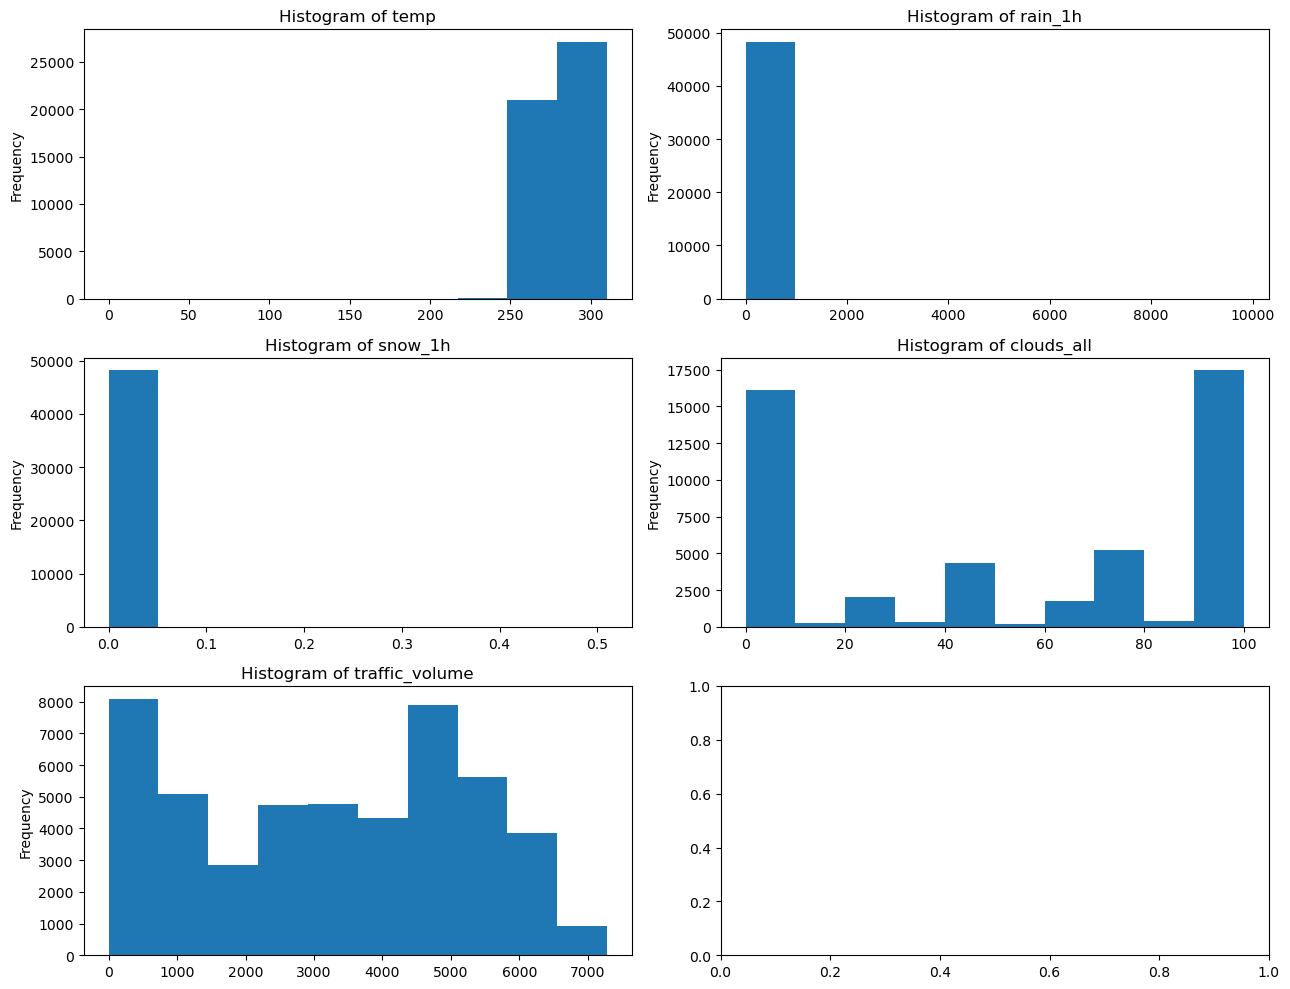

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 10))
for i, ax in zip(num_col, axes.flatten()):
    df[i].plot(kind='hist', ax=ax)
    ax.set_title(f'Histogram of {i}')
plt.tight_layout()
plt.show()

In [25]:
# mode of categorical variables
print('-----------Univariate Analysis-----------')
for i in cat_col:
    print(f'mode of {i} --> : ', df[i].mode()[0])

-----------Univariate Analysis-----------
mode of holiday --> :  None
mode of weather_main --> :  Clouds
mode of weather_description --> :  sky is clear
mode of Date --> :  16-12-2012
mode of Time --> :  04:00:00


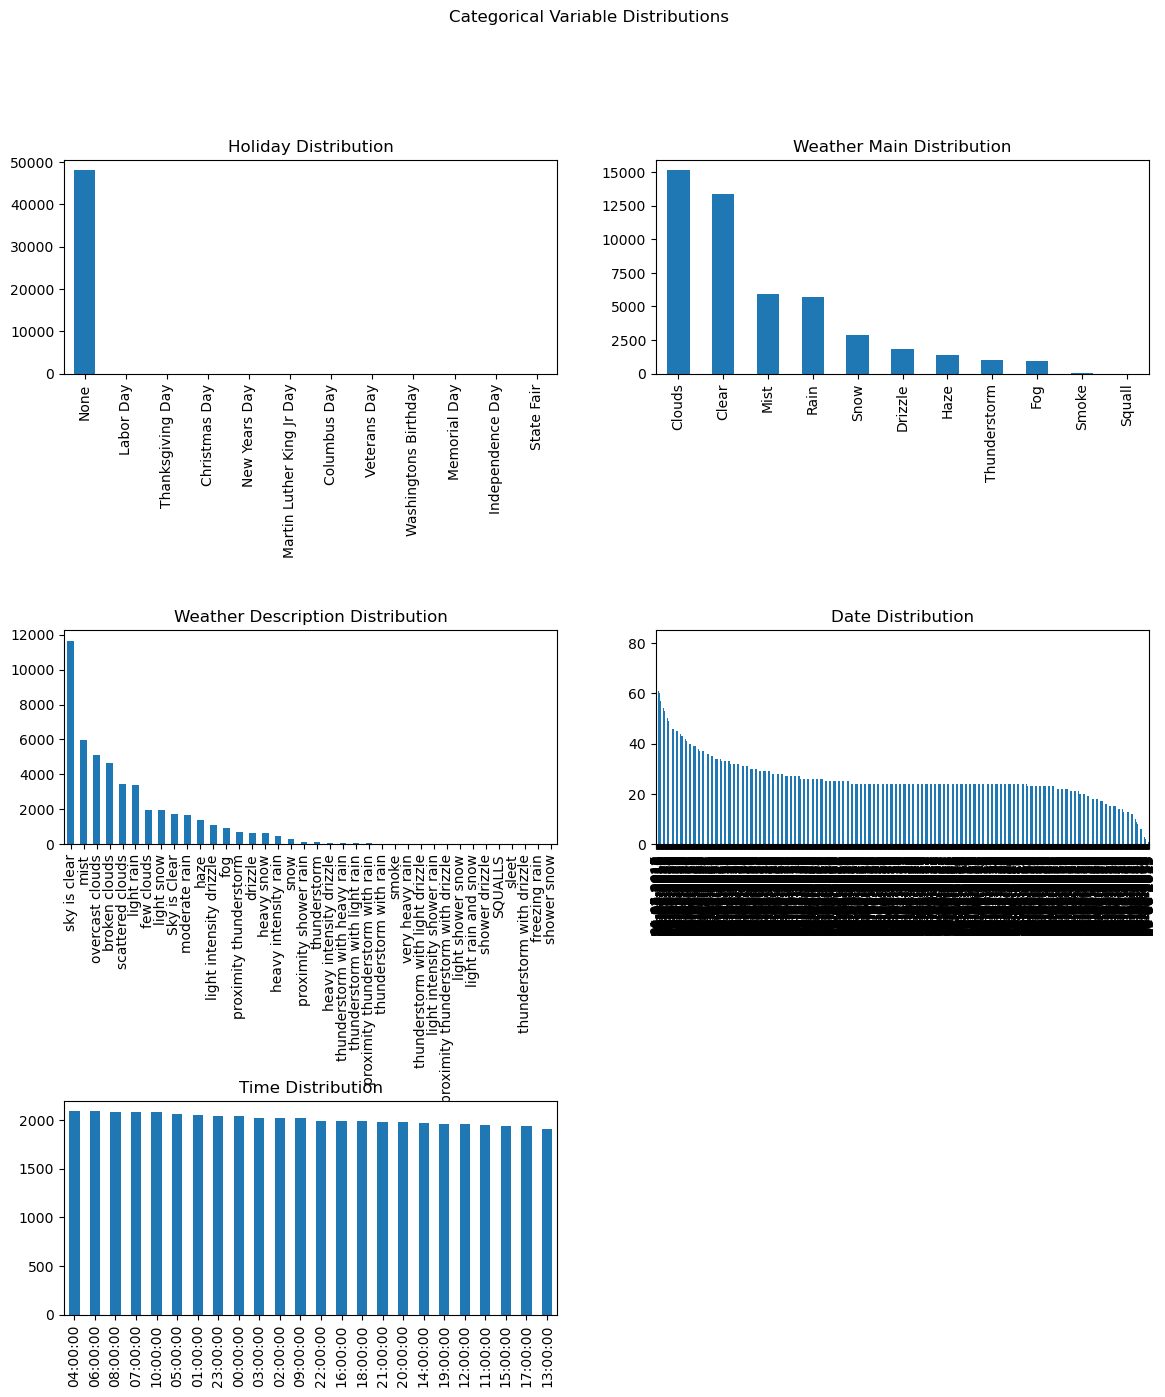

In [26]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14,15))

# Create a bar plot for the 'holiday' column
df['holiday'].value_counts().plot(kind='bar', ax=axs[0,0])
axs[0,0].set_title("Holiday Distribution")

# Create a bar plot for the 'weather_main' column
df['weather_main'].value_counts().plot(kind='bar', ax=axs[0,1])
axs[0,1].set_title("Weather Main Distribution")

# Create a bar plot for the 'weather_description' column
df['weather_description'].value_counts().plot(kind='bar', ax=axs[1,0])
axs[1,0].set_title("Weather Description Distribution")

# Create a bar plot for the 'Date' column
df['Date'].value_counts().plot(kind='bar', ax=axs[1,1])
axs[1,1].set_title("Date Distribution")

# Create a bar plot for the 'Time' column
df['Time'].value_counts().plot(kind='bar', ax=axs[2,0])
axs[2,0].set_title("Time Distribution")

# Hide the unused subplot
axs[2,1].axis('off')

# Adjust the vertical spacing between subplots
plt.subplots_adjust(hspace=1.2)

# Add a title to the figure
fig.suptitle("Categorical Variable Distributions")

plt.show()


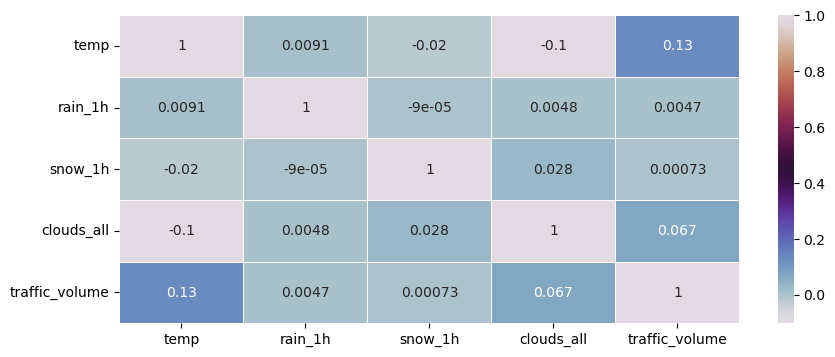

In [27]:
# cont vs cont (corr)
corr = df.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,annot=True,linewidths=0.5,cmap='twilight')
plt.show()

Text(0.5, 1.0, 'clouds_all')

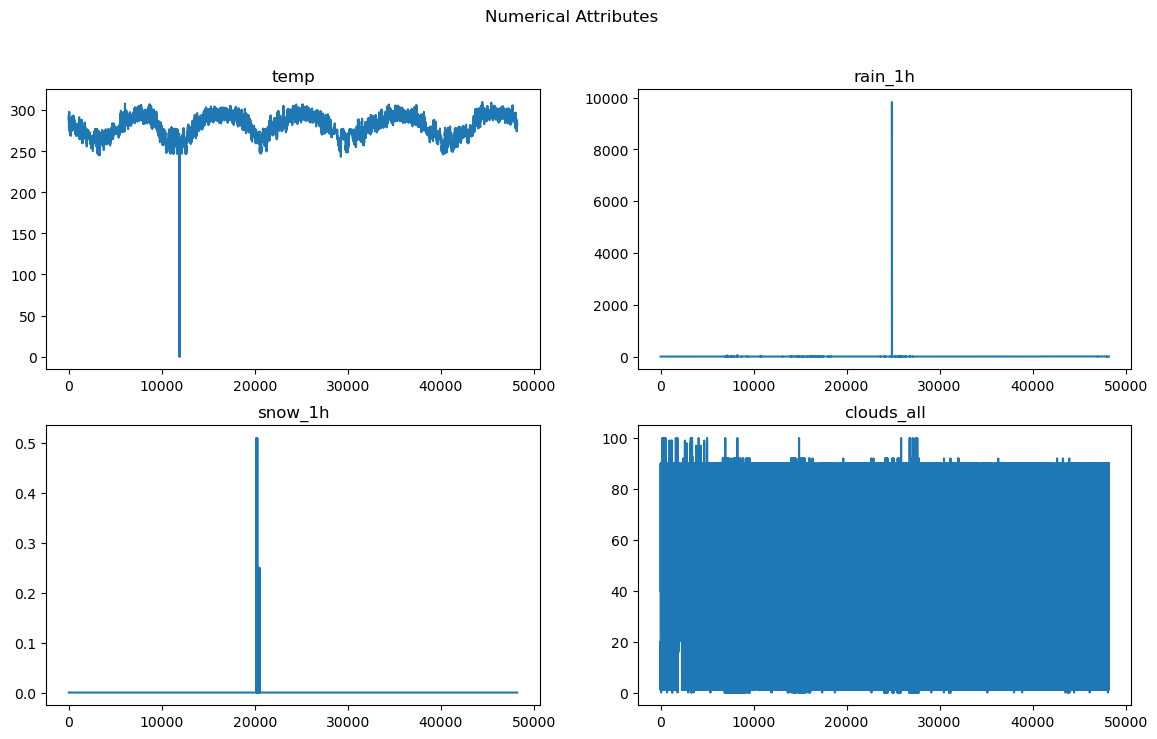

In [28]:
# plotting numeric varible plots
fig, ax = plt.subplots(2, 2,figsize=(14,8))
fig.suptitle('Numerical Attributes')
ax[0, 0].plot(df.temp)
ax[0, 0].set_title('temp')
ax[0, 1].plot(df.rain_1h)
ax[0, 1].set_title('rain_1h')
ax[1, 0].plot(df.snow_1h)
ax[1, 0].set_title('snow_1h')
ax[1, 1].plot(df.clouds_all)
ax[1, 1].set_title('clouds_all')

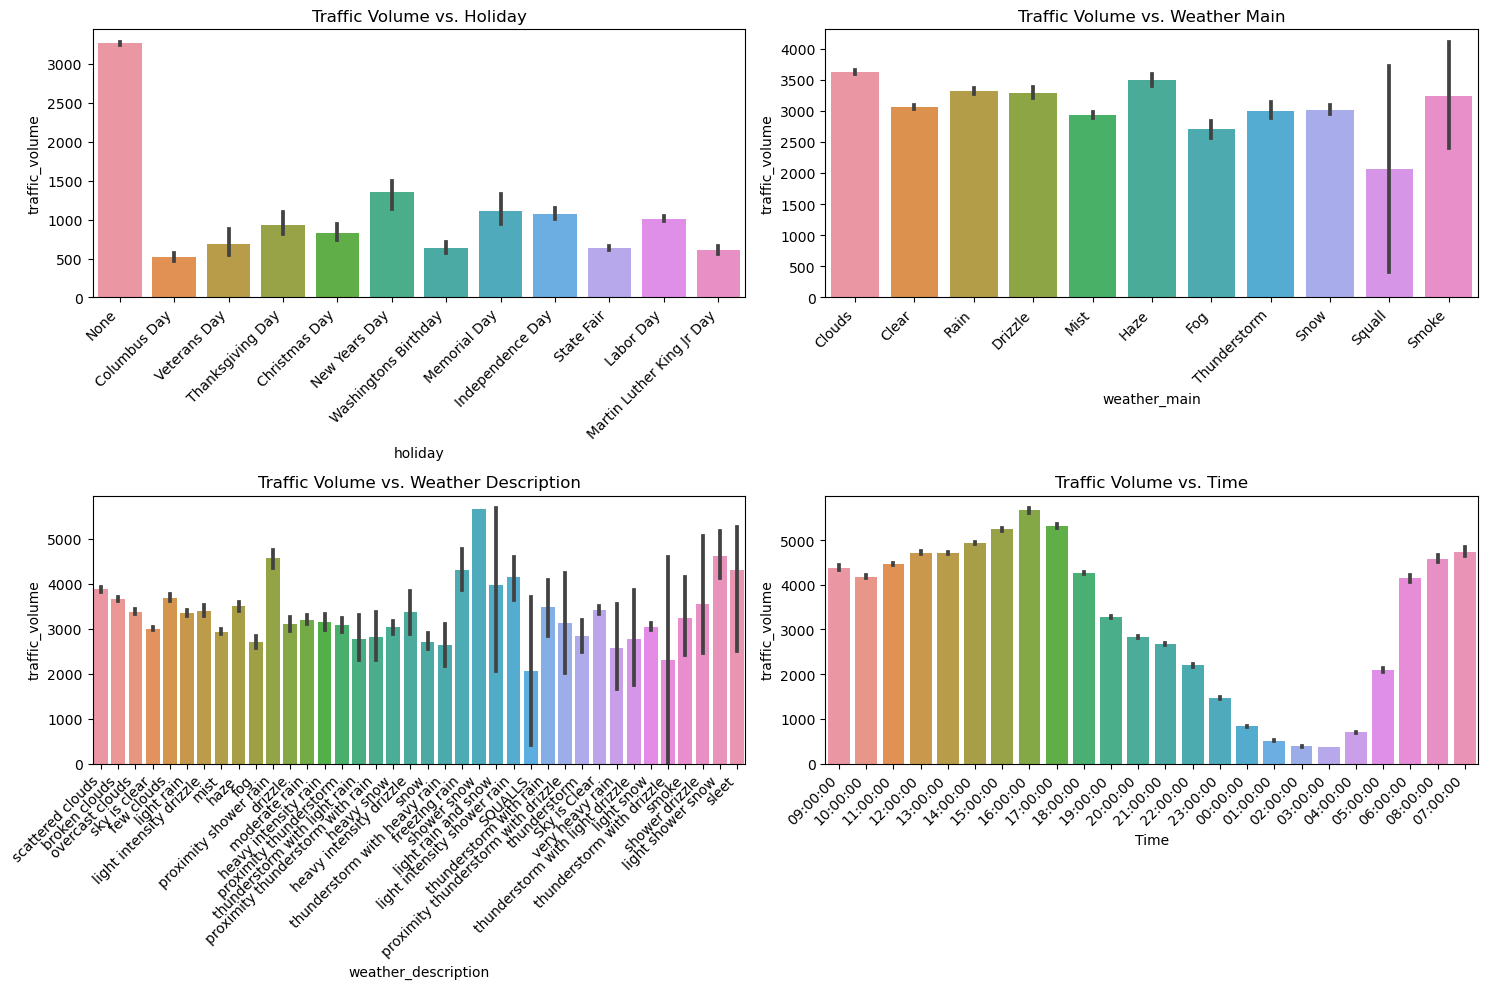

In [29]:
# cont vs cat 

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.barplot(x='holiday', y='traffic_volume', data=df,ax=axs[0,0])
sns.barplot(x='weather_main', y='traffic_volume', data=df,ax=axs[0,1])
sns.barplot(x='weather_description', y='traffic_volume', data=df,ax=axs[1,0])
sns.barplot(x='Time', y='traffic_volume', data=df,ax=axs[1,1])

# Set titles for each subplot
axs[0,0].set_title('Traffic Volume vs. Holiday')
axs[0,1].set_title('Traffic Volume vs. Weather Main')
axs[1,0].set_title('Traffic Volume vs. Weather Description')
axs[1,1].set_title('Traffic Volume vs. Time')

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [30]:
# 2 cat vs cat
from scipy.stats import chi2_contingency

# Create a frequency table for each categorical variable
#print(pd.crosstab(df['Time'], df['weather_main']))

# Perform a Chi-Square test to determine if there is an association between the two variables
for i in cat_col:
    for j in cat_col:
        contingency_table = pd.crosstab(df[i], df[j])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print()
        print(p_value)
        if p_value < 0.05:
            print(f'There is a significant association between the {i} & {j} variables.')
        else:
            print(f'There is no significant association between the {i} & {j} variables.')



0.0
There is a significant association between the holiday & holiday variables.

0.6639979285040547
There is no significant association between the holiday & weather_main variables.

1.0
There is no significant association between the holiday & weather_description variables.

1.8270345046524307e-94
There is a significant association between the holiday & Date variables.

4.130102755604797e-155
There is a significant association between the holiday & Time variables.

0.6639979285040544
There is no significant association between the weather_main & holiday variables.

0.0
There is a significant association between the weather_main & weather_main variables.

0.0
There is a significant association between the weather_main & weather_description variables.

0.0
There is a significant association between the weather_main & Date variables.

0.0
There is a significant association between the weather_main & Time variables.

1.0
There is no significant association between the weather_description

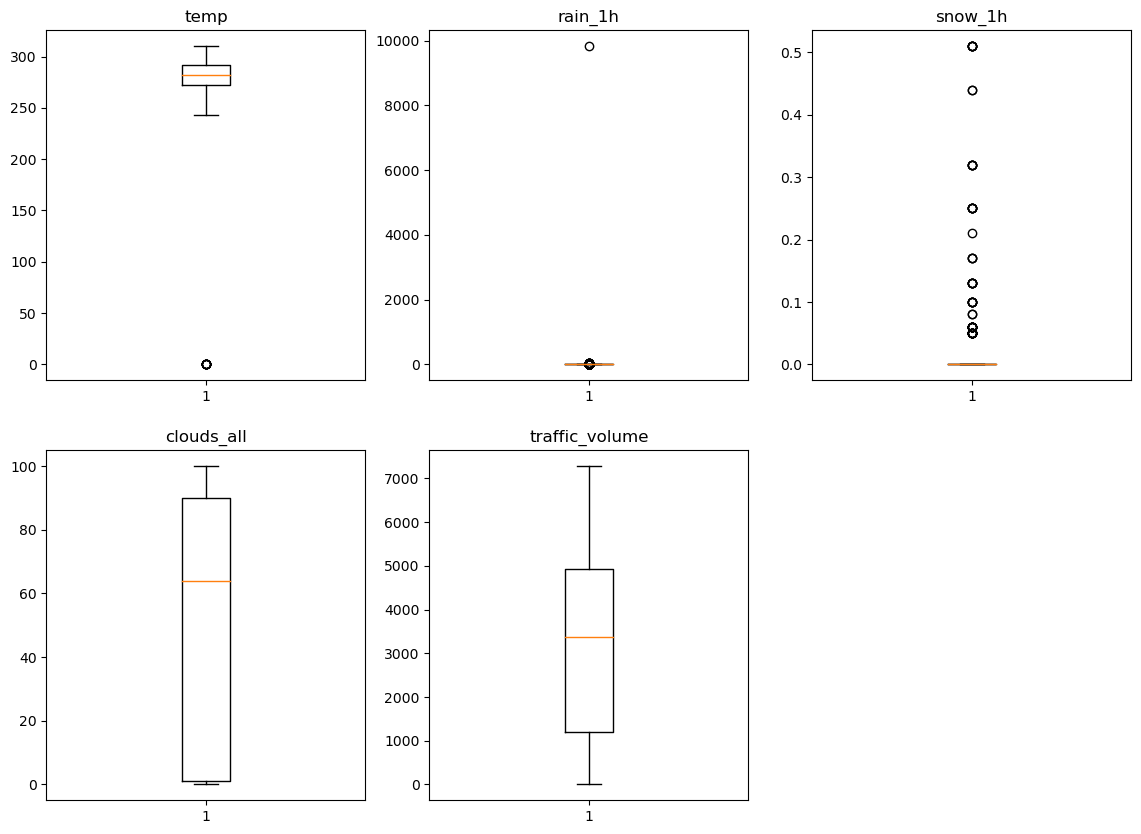

In [31]:
# Outliear Detection
fig, axs = plt.subplots(2, 3, figsize=(14, 10))

# Plot 1: temp
axs[0, 0].boxplot(df['temp'])
axs[0, 0].set_title("temp")

# Plot 2: rain_1h
axs[0, 1].boxplot(df['rain_1h'])
axs[0, 1].set_title("rain_1h")

# Plot 3: snow_1h
axs[0, 2].boxplot(df['snow_1h'])
axs[0, 2].set_title("snow_1h")

# Plot 4: clouds_all
axs[1, 0].boxplot(df['clouds_all'])
axs[1, 0].set_title("clouds_all")

# Plot 5: traffic_volume
axs[1, 1].boxplot(df['traffic_volume'])
axs[1, 1].set_title("traffic_volume")

axs[1,2].axis("off")

plt.show()

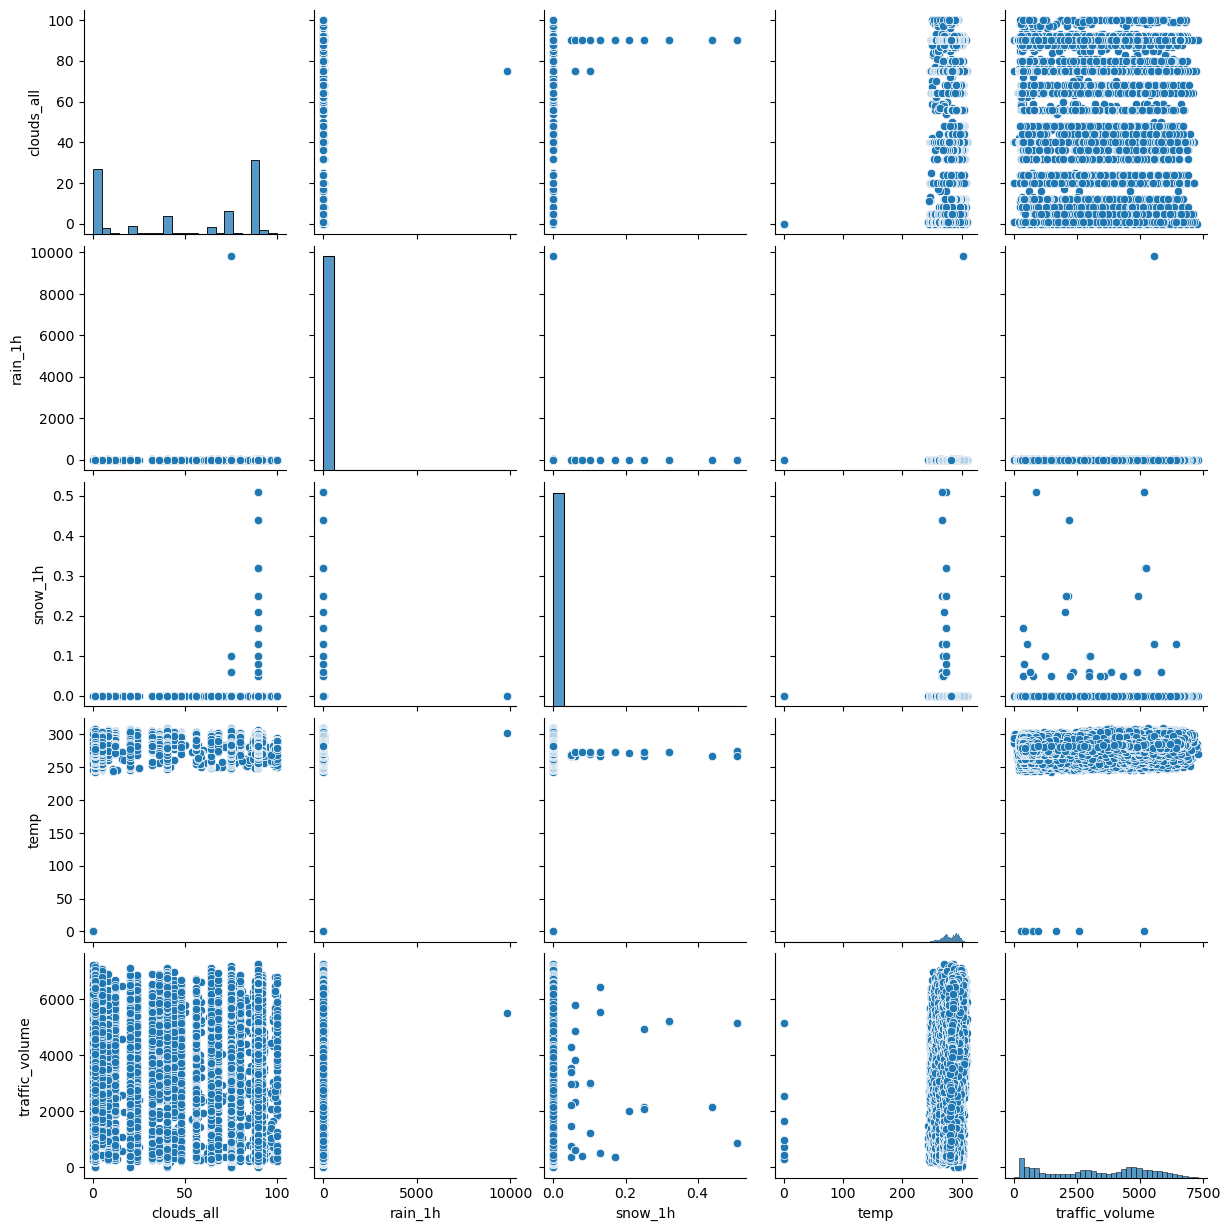

In [32]:
cols =['clouds_all','rain_1h','snow_1h','temp','traffic_volume']
sns.pairplot(df[cols])
plt.show()